**Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing**
_Jules EXBRAYAT & Abdenour MADANI_

# Import des outils / jeu de données

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

In [6]:
os.getcwd()

'/home/ab2/Documents/GitHub/analyse-survie/src'

In [7]:
np.random.seed(0)
sns.set_theme()

In [24]:
df = pd.read_csv(
    "../data/kickstarter_3.csv",
    parse_dates=True,
)

In [25]:
df.shape

(5720, 56)

In [26]:
df.head()

,day_succ,Status,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,usr_net_bic,1f_plg,1f_bck,1prj_prom,2f_plg,2f_bck,2prj_prom,3f_plg,3f_bck,3prj_prom
0,30,0,0,0,1,0,0,0,0,0,...,0.000000,-0.215130,-0.172303,0.000000,-0.244002,-0.172518,0.000000,-0.259185,-0.173517,0.000000
1,1,1,0,0,0,0,1,0,0,0,...,6.137421,1.784104,11.350010,4.374432,1.922931,11.156442,7.268294,1.785109,10.162673,1.419543
2,1,1,1,0,0,0,0,0,0,0,...,-0.078113,6.405284,0.197177,-0.265049,6.937114,0.173673,-0.280888,7.428667,0.162378,0.580395
3,13,1,0,1,0,0,0,0,0,0,...,-0.443733,-0.149581,-0.165461,-0.265049,0.007967,-0.157466,-0.280888,-0.041707,-0.156509,0.580395
4,30,0,0,1,0,0,0,0,0,0,...,-0.078113,-0.297066,-0.165461,-0.265049,-0.306995,-0.167501,0.222391,-0.313555,-0.169265,-0.258752


<Axes: >

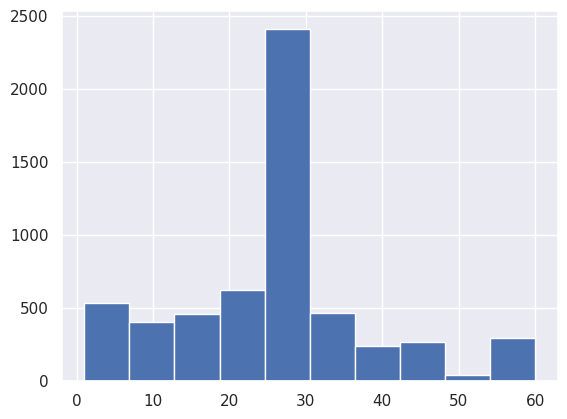

In [28]:
df["day_succ"].hist()

# Présentation

## Problématique

## Jeu de données

In [ ]:
# todo : ajouter une description / une partie pour parler du jeu de données
# "Ce jeu de données contient le profil de plusieurs clients d'une enseigne de grande distribution" \
# "Il contient les données de juillet 2012 à juillet 2014" \
# "Nous disposons des ventes en Vin, etc"

### Lecture des données

In [ ]:
df = pd.read_csv(
    "../data/marketing_campaign.csv", sep="\t", index_col="ID", parse_dates=True
)

### Présentation des variables

In [ ]:
df.head()

In [ ]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Nous séparons les variables numériques des variables catégoriques pour plus de commodités.

Nous convertissons les variables catégoriques en type `category`. (Nous les convertissons au préalable en type `string` car cela facilite l'affichage de la légende avec Matplotlib et Seaborn)

In [ ]:
df[var_categoriques] = df[var_categoriques].astype(str).astype("category")

In [ ]:
# todo: convertir en int la variable Income (qui est float)

Nous convertissons les variables au format date.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [ ]:
df.info()

Nous avons 11 variables catégoriques, 16 variables quantitatives (dont 15 entières) ainsi qu'une variable de type date.

# Découverte des données

## Analyse univariée

In [ ]:
df[var_numeriques].describe()

In [ ]:
df[var_categoriques].describe()

In [ ]:
# todo: commenter

## Visualisation

### Variables numériques

In [ ]:
for var in var_numeriques:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

In [ ]:
# todo: commenter les distributions et boxplots

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df[var_numeriques].corr()[df[var_numeriques].corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

In [ ]:
# todo: commenter la matrice de corrélation

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs présentes")
df.notna().sum()[var_numeriques].plot.barh(ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_numeriques].isna(), cbar=False, ax=ax[1])

Nous observons qu'il n'y a quasiment pas de valeurs manquantes parmi les variables numériques.

### Variables catégoriques

In [ ]:
for var in var_categoriques:
    if df[var].nunique() > 3:
        sns.histplot(y=df[var])
    else:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[var], shrink=0.3)
    plt.show()

In [ ]:
df[
    df[var_categoriques].columns[df[var_categoriques].nunique() > 3]
].value_counts().plot(kind="bar")

In [ ]:
# todo: commenter

#### Valeurs manquantes

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs présentes")
df.notna().sum()[var_categoriques].plot.barh(ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_categoriques].isna(), cbar=False, ax=ax[1])

Nous observons l'absence de valeurs manquantes parmi les variables catégoriques.

### Dates

In [ ]:
# todo

In [ ]:
df["Dt_Customer"].hist(bins=50)

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("../data/data.csv")